# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('/datasets/data.csv')

In [3]:
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод**

В таблицу заносили разнородные данные. На первый взгляд, в интересующих нас значениях пропусков нет. 
Трудовой стаж почти у всех имеет отрицательные значения, а положительные слишком большие, возможно на стадии составления таблицы в формулах ошибка.

## Шаг 2. Предобработка данных

### Обработка пропусков

In [4]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

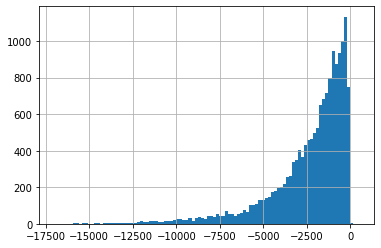

In [5]:
data['days_employed'].hist(bins=100,range=(-17000,500))

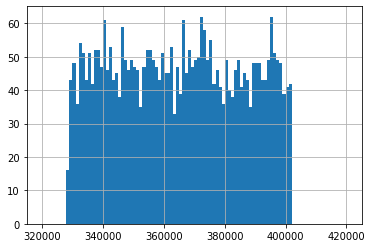

In [6]:
data['days_employed'].hist(bins=100,range=(320000,420000))

In [7]:
median_days_employed = data['days_employed'].median()
data['days_employed'] = data['days_employed'].fillna(median_days_employed)
data[data['days_employed'] == median_days_employed].nunique()

children             8
days_employed        1
dob_years           56
education           12
education_id         4
family_status        5
family_status_id     5
gender               2
income_type          5
debt                 2
total_income         1
purpose             38
dtype: int64

In [8]:
data['total_income'] = data['total_income'].fillna(data['total_income'].mean())

data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод**

Пропущенные значения находились в стоблцах days_employed и total_income.

days_employed почти у всех имеет отрицательные значения, а положительные слишком большие. Возможно на стадии составления таблицы в формулах ошибка. В качестве замены пропуска выберем медиану, так как она будет находиться в середине выборки и не  сильно повлияет на данные.

total_income имеет пропуски только у тех людей, у которых пропущено значение days_employed. Возможно они вообще не работали, возможно все данные об их работе утеряны или изначально отсутствовали. Это необходимо уточнить у кредитного отдела банка. На данном этапе заменим пропущенные значения средним.

### Замена типа данных

In [9]:
data.nunique() #ищем возможные аномалии в данных

children                8
days_employed       19351
dob_years              58
education              15
education_id            5
family_status           5
family_status_id        5
gender                  3
income_type             8
debt                    2
total_income        19352
purpose                38
dtype: int64

In [10]:
data['education'] = data['education'].str.lower()#приводим education к общему виду,
# проверяем, совпадает ли с количество уникальных значений с education_id
print(data['education'].unique())
data.nunique()

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


children                8
days_employed       19351
dob_years              58
education               5
education_id            5
family_status           5
family_status_id        5
gender                  3
income_type             8
debt                    2
total_income        19352
purpose                38
dtype: int64

In [11]:
data.groupby('gender')['children'].value_counts()#определяем третий пол, одновременно просматривая уникальные значения children

gender  children
F        0          9570
         1          3094
         2          1259
         3           196
         20           47
        -1            35
         4            28
         5             7
M        0          4578
         1          1724
         2           796
         3           134
         20           29
         4            13
        -1            12
         5             2
XNA      0             1
Name: children, dtype: int64

In [12]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


In [13]:
data['children'].replace(-1,1,inplace=True)

In [14]:
data = data[data['gender'] != 'XNA'].reset_index(drop = True)

In [15]:
data['children'].replace(20,2,inplace=True)
data[data['children'] == 20]['children'].count()

0

In [16]:
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21524 entries, 0 to 21523
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

Только в двух столбцах необходимо было менять тип данных, поэтому удобно применить метод astype().

### Обработка дубликатов

In [17]:
data.duplicated().sum()

71

In [18]:
data.groupby('income_type')['income_type'].value_counts()

income_type      income_type    
безработный      безработный            2
в декрете        в декрете              1
госслужащий      госслужащий         1459
компаньон        компаньон           5084
пенсионер        пенсионер           3856
предприниматель  предприниматель        2
сотрудник        сотрудник          11119
студент          студент                1
Name: income_type, dtype: int64

In [19]:
data[data.duplicated() == True].groupby('income_type')['income_type'].value_counts()

income_type  income_type
госслужащий  госслужащий     2
компаньон    компаньон       7
пенсионер    пенсионер      27
сотрудник    сотрудник      35
Name: income_type, dtype: int64

In [20]:
data = data.drop_duplicates().reset_index(drop = True)
data.duplicated().sum()

0

**Вывод**

Дубликатов не много и они снова вызваны столбцами days_employed и total_income. С ними явно что-то не так. Дубликаты удаляем, так как их очень мало. 

### Лемматизация

In [21]:
from pymystem3 import Mystem
from collections import Counter

m = Mystem() 
data['purpose'].str.lower()


def lemmas(text):
    new_text = m.lemmatize(text)
    return new_text


data['purpose'] = data['purpose'].apply(lemmas)

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,"[покупка, , жилье, \n]"
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,"[приобретение, , автомобиль, \n]"
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,"[покупка, , жилье, \n]"
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,"[дополнительный, , образование, \n]"
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,"[сыграть, , свадьба, \n]"


**Вывод**

Предварительно приведя все слова в столбце purpose, провёл Лемматизацию, с помощью метода apply().

### Категоризация данных

In [22]:
data['purpose'].value_counts()


[автомобиль, \n]                                          972
[свадьба, \n]                                             791
[на,  , проведение,  , свадьба, \n]                       768
[сыграть,  , свадьба, \n]                                 765
[операция,  , с,  , недвижимость, \n]                     675
[покупка,  , коммерческий,  , недвижимость, \n]           661
[операция,  , с,  , жилье, \n]                            652
[покупка,  , жилье,  , для,  , сдача, \n]                 651
[операция,  , с,  , коммерческий,  , недвижимость, \n]    650
[покупка,  , жилье, \n]                                   646
[жилье, \n]                                               646
[покупка,  , жилье,  , для,  , семья, \n]                 638
[строительство,  , собственный,  , недвижимость, \n]      635
[недвижимость, \n]                                        633
[операция,  , со,  , свой,  , недвижимость, \n]           627
[строительство,  , жилой,  , недвижимость, \n]            624
[покупка

In [23]:
def purpose_kateg(purpose):
    if 'автомобиль' in purpose:
        return 0
    if 'свадьба' in purpose:
        return 1
    if 'образование' in purpose:
        return 2 
    return 3 #недвижимость

In [24]:
dict_purpose_id = {0:'автомобиль',1:'свадьба',2:'образование',3:'недвижимость'}#словарь для групп purpose

In [25]:
data['purpose_id'] = data['purpose'].apply(purpose_kateg)
data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,"[покупка, , жилье, \n]",3
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,"[приобретение, , автомобиль, \n]",0
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,"[покупка, , жилье, \n]",3
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,"[дополнительный, , образование, \n]",2
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,"[сыграть, , свадьба, \n]",1
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,"[покупка, , жилье, \n]",3
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,"[операция, , с, , жилье, \n]",3
7,0,-152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,"[образование, \n]",2
8,2,-6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,"[на, , проведение, , свадьба, \n]",1
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,"[покупка, , жилье, , для, , семья, \n]",3


**Вывод**

In [26]:
data['purpose_id'].value_counts() 

3    10810
0     4306
2     4013
1     2324
Name: purpose_id, dtype: int64

Проведя анализ столбца purpose, я выделил 4 категории целей на кредит: жильё, автомобиль, образование, свадьба. Именно такие цели наиболее обще охватывают весь список.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [27]:
no_children = data[data['children'] == 0]['children'].count()
no_children_no_debt = data[(data['children'] == 0) & (data['debt'] == 0)]['children'].count()
have_children = data[data['children'] != 0]['children'].count()
have_children_no_debt = data[(data['children'] != 0) & (data['debt'] == 0)]['children'].count()

ratio_no_children = no_children_no_debt / no_children
ratio_have_children = have_children_no_debt / have_children

print('Процент людей с детьми, не имеющих задолжности: {:.2%} '.format(ratio_have_children))
print('Процент людей без детей, не имеющих задолжности: {:.2%}'.format(ratio_no_children))

Процент людей с детьми, не имеющих задолжности: 90.79% 
Процент людей без детей, не имеющих задолжности: 92.46%


In [28]:
ratio_no_children = data.groupby('children')['debt'].mean()
ratio_no_children

children
0    0.075444
1    0.091658
2    0.094925
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

**Вывод**

Похоже, люди без детей более вероятно будут платить в срок

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
family_status = data.groupby('family_status')['family_status_id'].value_counts()
family_status

family_status          family_status_id
Не женат / не замужем  4                    2810
в разводе              3                    1195
вдовец / вдова         2                     959
гражданский брак       1                    4150
женат / замужем        0                   12339
Name: family_status_id, dtype: int64

In [30]:
ratio_family_status = []
for i in range(5):
    family_status = data[data['family_status_id'] == i]['family_status'].count()
    family_status_no_debt = data[(data['family_status_id'] == i) & (data['debt'] == 0)]['family_status'].count()
    ratio_family_status.append(family_status_no_debt / family_status)

print('Процент женатых / замужем людей, не имеющих задолжности: {:.2%}'.format(ratio_family_status[0]))
print('Процент в гражданском браке людей, не имеющих задолжности: {:.2%}'.format(ratio_family_status[1]))
print('Процент вдовецов / вдов, не имеющих задолжности: {:.2%}'.format(ratio_family_status[2]))
print('Процент людей в разводе, не имеющих задолжности: {:.2%}'.format(ratio_family_status[3]))
print('Процент Не женат / не замужем людей, не имеющих задолжности: {:.2%}'.format(ratio_family_status[4]))

Процент женатых / замужем людей, не имеющих задолжности: 92.45%
Процент в гражданском браке людей, не имеющих задолжности: 90.65%
Процент вдовецов / вдов, не имеющих задолжности: 93.43%
Процент людей в разводе, не имеющих задолжности: 92.89%
Процент Не женат / не замужем людей, не имеющих задолжности: 90.25%


**Вывод**

Люди, находящиеся в браке, чаще задерживают по кредиту!

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
high_income = data[data['total_income'] > 70000]['total_income'].count()
high_income_no_debt = data[(data['total_income'] > 70000) & (data['debt'] == 0)]['children'].count()
ratio_high_income = high_income_no_debt / high_income

middle_income = data[(data['total_income'] <= 70000) & (data['total_income'] < 30000)]['total_income'].count()
middle_income_no_debt = data[(data['total_income'] <= 70000)& (data['total_income'] < 30000) & (data['debt'] == 0)]['children'].count()
ratio_middle_income = middle_income_no_debt / middle_income

low_income = data[data['total_income'] <= 30000]['total_income'].count()
low_income_no_debt = data[(data['total_income'] <= 30000) & (data['debt'] == 0)]['children'].count()
ratio_low_income = low_income_no_debt / low_income

print('Процент людей c низким доходом, не имеющих задолжности: {:.2%}'.format(ratio_low_income))
print('Процент людей cо средним доходом, не имеющих задолжности: {:.2%}'.format(ratio_middle_income))
print('Процент людей c высоким доходом, не имеющих задолжности: {:.2%}'.format(ratio_high_income))

Процент людей c низким доходом, не имеющих задолжности: 90.91%
Процент людей cо средним доходом, не имеющих задолжности: 90.91%
Процент людей c высоким доходом, не имеющих задолжности: 91.79%


**Вывод**

Люди с высоким доходом реже позволяют себе задерживать выплаты по кредиту.

- Как разные цели кредита влияют на его возврат в срок?

In [32]:
ratio_purpose = []
for i in range(4):
    purpose = data[data['purpose_id'] == i]['purpose'].count()
    purpose_no_debt = data[(data['purpose_id'] == i) & (data['purpose'] == 0)]['purpose'].count()
    ratio_purpose.append(purpose_no_debt / purpose)

print('Процент людей с целью автомобиль, не имеющих задолжности: {:.2%}'.format(ratio_family_status[0]))
print('Процент людей с целью свадьба, не имеющих задолжности: {:.2%}'.format(ratio_family_status[1]))
print('Процент людей с целью образование, не имеющих задолжности: {:.2%}'.format(ratio_family_status[2]))
print('Процент людей с целью недвижимость, не имеющих задолжности: {:.2%}'.format(ratio_family_status[3]))

Процент людей с целью автомобиль, не имеющих задолжности: 92.45%
Процент людей с целью свадьба, не имеющих задолжности: 90.65%
Процент людей с целью образование, не имеющих задолжности: 93.43%
Процент людей с целью недвижимость, не имеющих задолжности: 92.89%


Процент людей, задерживабщих задолжности, с разными видами занятости и целями.

In [33]:
print(dict_purpose_id)
table = data.pivot_table(index='purpose_id', columns='income_type', values='debt', aggfunc='mean').fillna('-')
table

{0: 'автомобиль', 1: 'свадьба', 2: 'образование', 3: 'недвижимость'}


income_type,безработный,в декрете,госслужащий,компаньон,пенсионер,предприниматель,сотрудник,студент
purpose_id,,,,,,,,
0,-,1,0.076923,0.080798,0.064151,-,0.112339,-
1,-,-,0.044025,0.099048,0.059242,0,0.083813,-
2,-,-,0.081395,0.075472,0.066574,-,0.110096,-
3,0.5,-,0.047745,0.065593,0.048652,0,0.086554,0


In [34]:
table['purpose'] = table.index.map(dict_purpose_id)

In [35]:
table.set_index('purpose')

income_type,безработный,в декрете,госслужащий,компаньон,пенсионер,предприниматель,сотрудник,студент
purpose,,,,,,,,
автомобиль,-,1,0.076923,0.080798,0.064151,-,0.112339,-
свадьба,-,-,0.044025,0.099048,0.059242,0,0.083813,-
образование,-,-,0.081395,0.075472,0.066574,-,0.110096,-
недвижимость,0.5,-,0.047745,0.065593,0.048652,0,0.086554,0


In [36]:
data.pivot_table(index='income_type', columns='gender', values='debt', aggfunc='mean').fillna('')

gender,F,M
income_type,,
безработный,0,1
в декрете,1,
госслужащий,0.0541045,0.0727273
компаньон,0.0661235,0.0874867
пенсионер,0.052682,0.0731707
предприниматель,0,0
сотрудник,0.082497,0.116527
студент,,0


**Вывод**

За свадьбу не очень любят платить, а вот на учебу не жалеют денег.

## Шаг 4. Общий вывод

Люди в браке чаще задерживают по кредиту, чем остальные. Люди имеющие детей также чаще задерживают. 
Если человек находится в гражданком браке, у него есть дети и его доходы невысокие, а он берет кредит на свадьбу, то, вероятно, стоит задуматься над тем, выдавать ли ему кредит (но эту гипотезу еще надо проверить).